# FIRST,A BRIEF RECAP OF DEEP LEARNING USING THE MNIST DATASET

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import warnings
warnings.filterwarnings('ignore')
sess = tf.InteractiveSession()

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


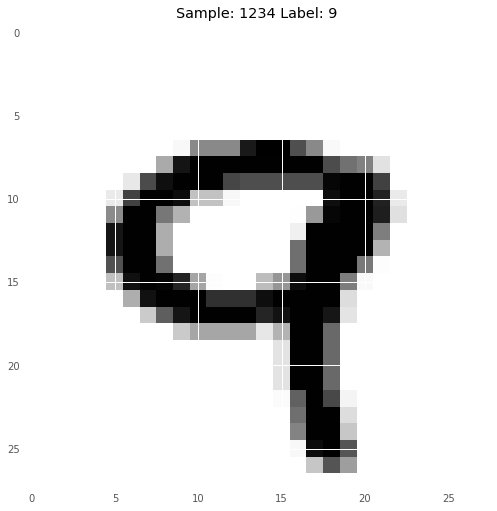

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(15,8))

def display_sample(num):
    #print the one_hot arrayof this sample's label
    print(mnist.train.labels[num])
    #Print the label converted back to a number
    label = mnist.train.labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28*28 image
    image = mnist.train.images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    
    
display_sample(1234);

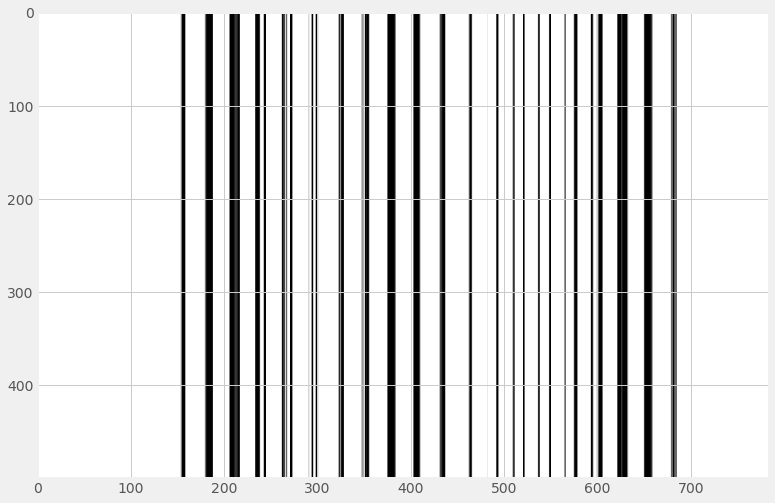

In [12]:
import numpy as np
style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

images = mnist.train.images[0].reshape([1,784])
for i in range(1,500):
    images = np.concatenate((images,mnist.train.images[1].reshape([1,784])))
    
plt.imshow(images, cmap=plt.get_cmap('gray_r'));

In [14]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32,shape=[None, 10])

hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros([10]))

input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer,hidden_weights) + hidden_biases

loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=digit_weights, labels=target_labels))

optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

correct_prediction = tf.equal(tf.argmax(digit_weights,1),tf.argmax(target_labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [15]:
tf.global_variables_initializer().run()

for x in range(2000):
    batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: batch[0], target_labels: batch[1]})
    if ((x+1) % 100 == 0):
        print(f'Training epoch {str(x+1)}')
        print(f'Acurracy: {str(accuracy.eval(feed_dict={input_images: mnist.test.images,target_labels: mnist.test.labels}))} ')

Training epoch 100
Acurracy: 0.8396 
Training epoch 200
Acurracy: 0.865 
Training epoch 300
Acurracy: 0.8823 
Training epoch 400
Acurracy: 0.8862 
Training epoch 500
Acurracy: 0.8933 
Training epoch 600
Acurracy: 0.8956 
Training epoch 700
Acurracy: 0.8968 
Training epoch 800
Acurracy: 0.908 
Training epoch 900
Acurracy: 0.9106 
Training epoch 1000
Acurracy: 0.9114 
Training epoch 1100
Acurracy: 0.9103 
Training epoch 1200
Acurracy: 0.914 
Training epoch 1300
Acurracy: 0.9147 
Training epoch 1400
Acurracy: 0.9197 
Training epoch 1500
Acurracy: 0.9202 
Training epoch 1600
Acurracy: 0.9226 
Training epoch 1700
Acurracy: 0.924 
Training epoch 1800
Acurracy: 0.9259 
Training epoch 1900
Acurracy: 0.9251 
Training epoch 2000
Acurracy: 0.925 


# TRADING  USING DEEP REINFORCEMENT LEARNING

Reinforcement learning (RL) is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward.

Every reinforcement learning problem starts out with an environment and one or more agents that can interact with the environment.

    TensorTrade is an open source Python framework for training, evaluating, and deploying robust trading strategies using deep reinforcement learning. The framework focuses on being highly composable and extensible, to allow the system to scale from simple trading strategies on a single CPU, to complex investment strategies run on a distribution of HPC machines.